## Step 1 Problem definition 


* Housing loan company provides the loan to the customers by validating certain parameters, now they have come to you to automate this process and they want you to build a model that tells if the customer should be given the loan or not

## Step 2 Import the libs

In [179]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step 3 Read the data

In [180]:
data = pd.read_csv(r'D:\MachineLearning\Data-Science-Projects-master\Decision Tree - Awesome Housing Loan\data.csv')

In [181]:
data.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Y,Male,No,Graduate,No,5849,0.0,0.0,NaN,360.0,1.0,Urban
1,LP001003,N,Male,Yes,Graduate,No,4583,1508.0,1.0,128.0,360.0,1.0,Rural
2,LP001005,Y,Male,Yes,Graduate,Yes,3000,0.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,Y,Male,Yes,Not Graduate,No,2583,2358.0,0.0,120.0,360.0,1.0,Urban
4,LP001008,Y,Male,No,Graduate,No,6000,0.0,0.0,141.0,360.0,1.0,Urban


In [182]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,600.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,0.761667,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,1.014847,85.587325,65.12041,0.364878
min,150.000000,0.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,0.000000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,2.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,3.000000,700.000000,480.00000,1.000000


## Step 4 Handle Missing values

In [183]:
data.isnull().sum()

Loan_ID               0
Loan_Status           0
Gender                0
Married               0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Dependents           14
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [184]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer.fit(data.iloc[:,8:9])
data.iloc[:,8:9] = imputer.transform(data.iloc[:,8:9])

In [185]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer.fit(data.iloc[:,9:12])
data.iloc[:,9:12] = imputer.transform(data.iloc[:,9:12])

In [186]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [187]:
data['Self_Employed']=data['Self_Employed'].fillna('No')

In [188]:
##Now our data is cleaned the missing values are handeled 


## Step 5 Visualizing the dataset

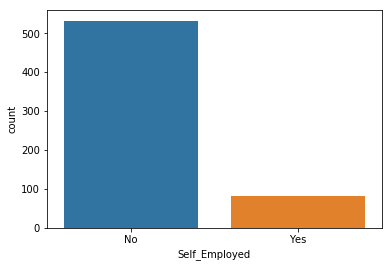

In [59]:
sns.countplot(data['Self_Employed'])

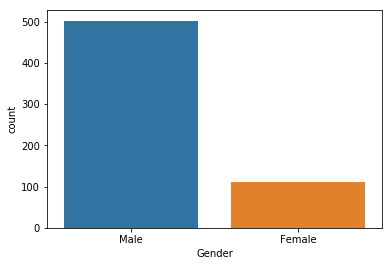

In [57]:
sns.countplot(data['Gender'])

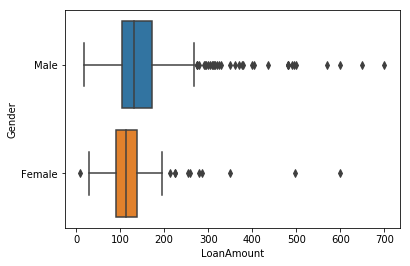

In [189]:
sns.boxplot(data['LoanAmount'],data['Gender'] )

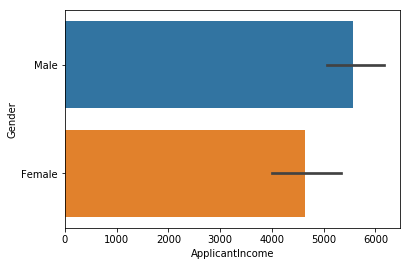

In [62]:
sns.barplot(data['ApplicantIncome'], data['Gender'])

## Step 6 Modeling the data

In [190]:
data.columns

Index(['Loan_ID', 'Loan_Status', 'Gender', 'Married', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Dependents',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [191]:
data.Gender.value_counts()
gender_cat = pd.get_dummies(data.Gender,prefix='gender').gender_Female

In [192]:
data['Married'].value_counts()
married_cat = pd.get_dummies(data['Married'],prefix='married').married_Yes

In [193]:
data['Education'].value_counts()
Education_cat = pd.get_dummies(data['Education'],prefix='education').education_Graduate

In [194]:
data['Self_Employed'].value_counts()
Employeed_cat = pd.get_dummies(data['Self_Employed'],prefix='selfemployed').selfemployed_Yes

In [195]:
loan_status = pd.get_dummies(data['Loan_Status'],prefix='status').status_Y
property_category = pd.get_dummies(data['Property_Area'],prefix='property')

In [196]:
data.shape

(614, 13)

In [197]:
data_new=pd.concat([data,gender_cat,married_cat,Education_cat,Employeed_cat,property_category,loan_status],axis=1)

In [198]:
data_new.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,...,Credit_History,Property_Area,gender_Female,married_Yes,education_Graduate,selfemployed_Yes,property_Rural,property_Semiurban,property_Urban,status_Y
0,LP001002,Y,Male,No,Graduate,No,5849,0.0,0.0,146.412162,...,1.0,Urban,0,0,1,0,0,0,1,1
1,LP001003,N,Male,Yes,Graduate,No,4583,1508.0,1.0,128.000000,...,1.0,Rural,0,1,1,0,1,0,0,0
2,LP001005,Y,Male,Yes,Graduate,Yes,3000,0.0,0.0,66.000000,...,1.0,Urban,0,1,1,1,0,0,1,1
3,LP001006,Y,Male,Yes,Not Graduate,No,2583,2358.0,0.0,120.000000,...,1.0,Urban,0,1,0,0,0,0,1,1
4,LP001008,Y,Male,No,Graduate,No,6000,0.0,0.0,141.000000,...,1.0,Urban,0,0,1,0,0,0,1,1


In [199]:
data_new.shape

(614, 21)

In [200]:
data_new.columns

Index(['Loan_ID', 'Loan_Status', 'Gender', 'Married', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Dependents',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'gender_Female', 'married_Yes', 'education_Graduate',
       'selfemployed_Yes', 'property_Rural', 'property_Semiurban',
       'property_Urban', 'status_Y'],
      dtype='object')

In [201]:
feature_cols=['ApplicantIncome', 'CoapplicantIncome', 'Dependents',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'gender_Female', 'married_Yes', 'selfemployed_Yes',
       'property_Rural', 'property_Semiurban', 'property_Urban']

In [202]:
feature_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'Dependents',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'gender_Female',
 'married_Yes',
 'selfemployed_Yes',
 'property_Rural',
 'property_Semiurban',
 'property_Urban']

In [203]:
X=data_new[feature_cols]

In [204]:
y=data_new['status_Y']

In [133]:
X

,Loan_ID,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,gender_Female,married_Yes,selfemployed_Yes,property_Rural,property_Semiurban,property_Urban
0,LP001002,5849,0.0,0.000000,146.412162,360.0,1.000000,0,0,0,0,0,1
1,LP001003,4583,1508.0,1.000000,128.000000,360.0,1.000000,0,1,0,1,0,0
2,LP001005,3000,0.0,0.000000,66.000000,360.0,1.000000,0,1,1,0,0,1
3,LP001006,2583,2358.0,0.000000,120.000000,360.0,1.000000,0,1,0,0,0,1
4,LP001008,6000,0.0,0.000000,141.000000,360.0,1.000000,0,0,0,0,0,1
5,LP001011,5417,4196.0,2.000000,267.000000,360.0,1.000000,0,1,1,0,0,1
6,LP001013,2333,1516.0,0.000000,95.000000,360.0,1.000000,0,1,0,0,0,1
7,LP001014,3036,2504.0,3.000000,158.000000,360.0,0.000000,0,1,0,0,1,0
8,LP001018,4006,1526.0,2.000000,168.000000,360.0,1.000000,0,1,0,0,0,1
9,LP001020,12841,10968.0,1.000000,349.000000,360.0,1.000000,0,1,0,0,1,0


In [134]:
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: status_Y, Length: 614, dtype: uint8

In [205]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [206]:
X_train.shape

(491, 12)

In [207]:
X_test.shape

(123, 12)

In [208]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [209]:
y_pred=dec.predict(X_test)

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6991869918699187
[[22 21]
 [16 64]]


# Using Random forests for the same data

In [214]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10000)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [215]:
y_pred=rfc.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score
print('accurecy from random forest....',accuracy_score(y_test,y_pred)*100)

accurecy from random forest.... 75.60975609756098
